# Zeotap Data Science Internship Task - 3

### Customer Segmentation / Clustering (I'll be using KMeans Clustering for the data)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
customers_path = '/content/drive/MyDrive/ZeoTap/Customers.csv'
products_path = '/content/drive/MyDrive/ZeoTap/Products.csv'
transactions_path = '/content/drive/MyDrive/ZeoTap/Transactions.csv'
customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

Merge the data

In [3]:
# Merging customer data with transaction data
customer_transactions = pd.merge(transactions, customers, on='CustomerID')
customer_features = customer_transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    purchase_frequency=('TransactionID', 'count'),
    avg_purchase_value=('TotalValue', 'mean')
).reset_index()

customer_profile = pd.merge(customer_features, customers[['CustomerID', 'Region']], on='CustomerID')

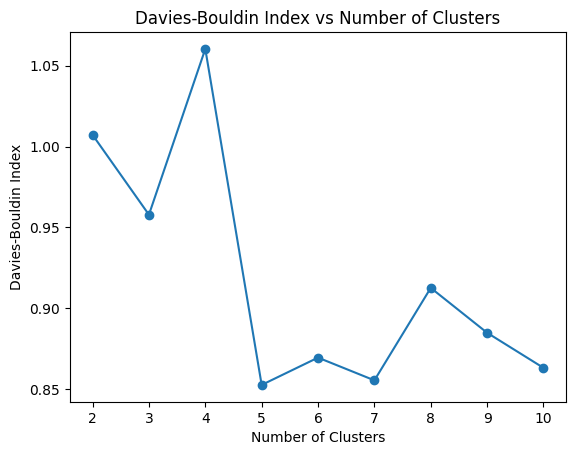

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profile[['total_spent', 'purchase_frequency', 'avg_purchase_value']])
# Try different values for k (2 to 10)
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    db_score = davies_bouldin_score(scaled_features, kmeans.labels_)
    db_scores.append(db_score)

# Plot DB Index vs number of clusters
import matplotlib.pyplot as plt

plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.show()

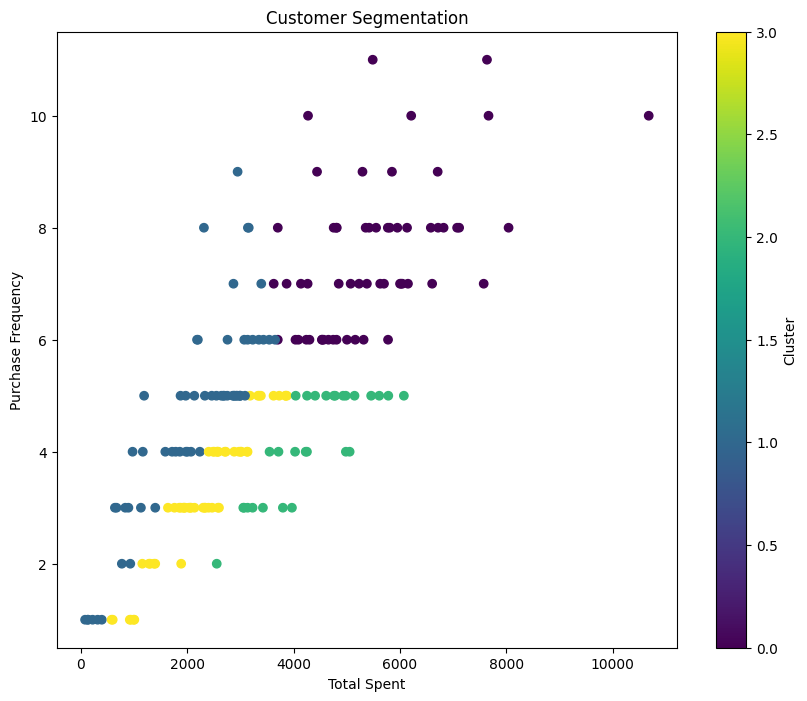

In [15]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters using a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(customer_profile['total_spent'], customer_profile['purchase_frequency'], c=customer_profile['Cluster'], cmap='viridis')
plt.xlabel('Total Spent')
plt.ylabel('Purchase Frequency')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()

Cluster Profiles

In [16]:
cluster_profile = customer_profile.groupby('Cluster').agg(
    total_spent_mean=('total_spent', 'mean'),
    purchase_frequency_mean=('purchase_frequency', 'mean'),
    avg_purchase_value_mean=('avg_purchase_value', 'mean'),
    total_spent_sum=('total_spent', 'sum'),
    purchase_frequency_sum=('purchase_frequency', 'sum'),
    avg_purchase_value_sum=('avg_purchase_value', 'sum')
).reset_index()

print("Cluster Profile (Numerical Features):")
print(cluster_profile)

Cluster Profile (Numerical Features):
   Cluster  total_spent_mean  purchase_frequency_mean  \
0        0       5521.543966                 7.517241   
1        1       2103.758333                 4.583333   
2        2       4317.132143                 4.142857   
3        3       2313.977547                 3.264151   

   avg_purchase_value_mean  total_spent_sum  purchase_frequency_sum  \
0               741.147332        320249.55                     436   
1               435.310875        126225.50                     275   
2              1056.828643        120879.70                     116   
3               719.472764        122640.81                     173   

   avg_purchase_value_sum  
0            42986.545239  
1            26118.652504  
2            29591.202000  
3            38132.056500  


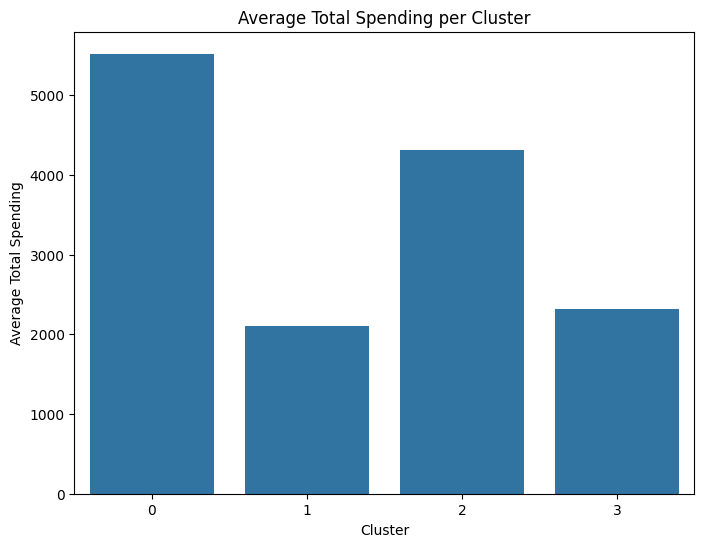

In [18]:
# Plot the total spending per cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='total_spent_mean', data=cluster_profile)
plt.title('Average Total Spending per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Spending')
plt.show()

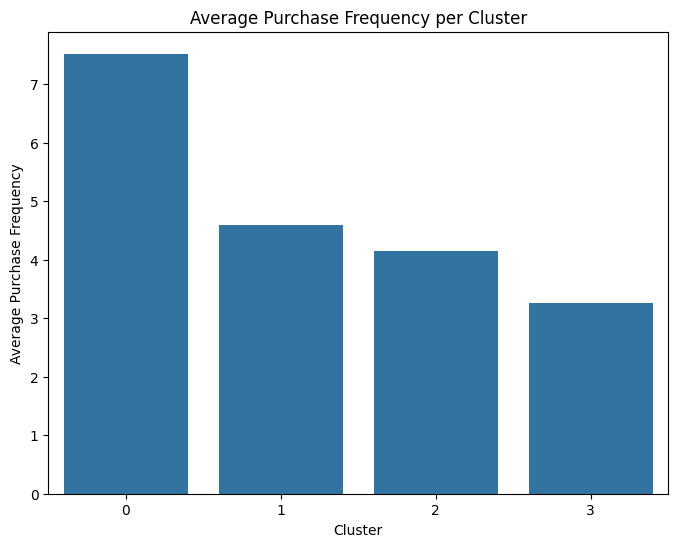

In [19]:
# Plot the purchase frequency per cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='purchase_frequency_mean', data=cluster_profile)
plt.title('Average Purchase Frequency per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Frequency')
plt.show()

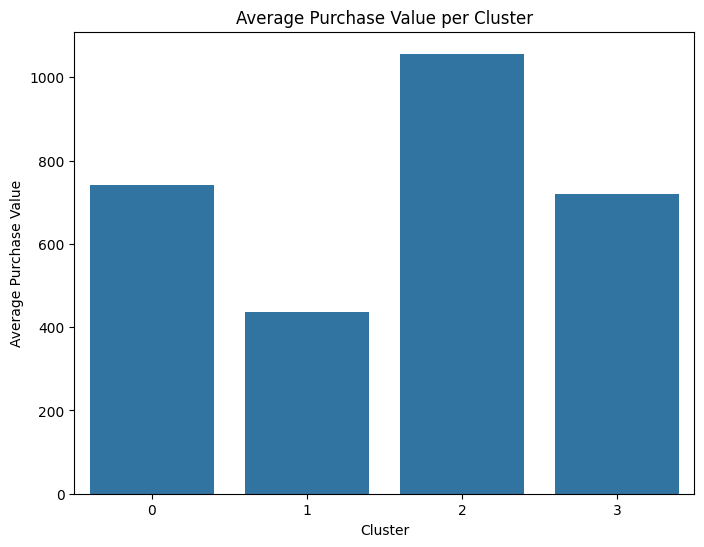

In [20]:
# Plot the average purchase value per cluster
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='avg_purchase_value_mean', data=cluster_profile)
plt.title('Average Purchase Value per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Value')
plt.show()